In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = glob.glob('data-to-use/*.csv')

In [37]:
df_feb = df_march = df_jan = df_2019 = df_jan_march = df_day1 = df_day2 = df_day3 = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_2019 = df_jan_march.append(df[(df.years == 2019)], ignore_index=True)
    df_jan_march = df_feb.append(df[(df.years == 2020) & (df.months < 4)], ignore_index=True)
    df_day3 = df_day3.append(df[(df.years == 2020) & (df.weekdays == 0)], ignore_index=True)

Text(0.5, 1.0, 'Percentages of Key Search Terms By Week (January-March 2020)')

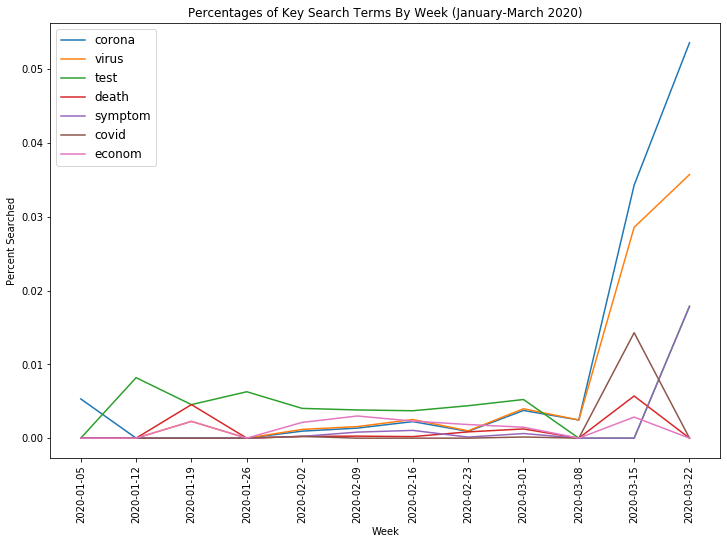

In [6]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d = {
    'corona': 0,
    'virus': 1,
    'test': 2,
    'death': 3,
    'symptom': 4,
    'covid': 5,
    'econom': 6
}

d2 = {
    0: 'corona',
    1: 'virus',
    2: 'test',
    3: 'death',
    4: 'symptom',
    5: 'covid',
    6: 'econom'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(7)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            if 'corona' in q:
                wdist[d['corona']]+=1
            if 'virus' in q:
                wdist[d['virus']]+=1
            if 'test' in q:
                wdist[d['test']]+=1
            if 'death' in q:
                wdist[d['death']]+=1
            if 'symptom' in q:
                wdist[d['symptom']]+=1
            if 'covid' in q:
                wdist[d['covid']]+=1
            if 'econom' in q:
                wdist[d['econom']]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week (January-March 2020)")

Text(0.5, 1.0, 'Percentages of Key Search Terms (Places) By Week (January-March 2020)')

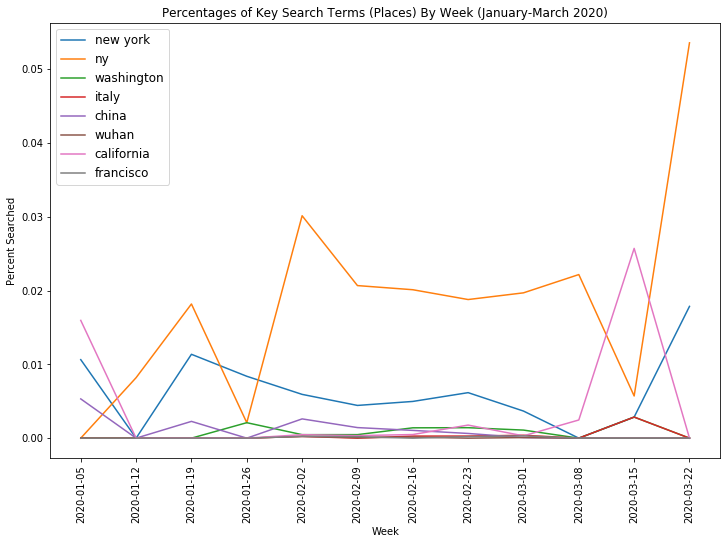

In [7]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d_place = {
    'new york': 0,
    'ny': 1,
    'washington': 2,
    'italy': 3,
    'china': 4,
    'wuhan': 5,
    'california': 6,
    'francisco': 7
}

d2_place = {
    0: 'new york',
    1: 'ny',
    2: 'washington',
    3: 'italy',
    4: 'china',
    5: 'wuhan',
    6: 'california',
    7: 'francisco'
}

history_place = []
weekly_totals_place = []
labels_place = [] 
for week, wdf_place in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf_place) >0:
        wdist_place = [0 for i in range(8)]
        week_label_place = str(week).split(' ')[0]
        labels_place.append(week_label_place)
        weekly_totals_place.append(len(wdf_place))
#         print(week_label, len(wdf))
        weekly_queries_place = [str(q).lower() for q in wdf_place['query'].values.tolist()]
        for q in weekly_queries_place:
            if 'new york' in q:
                wdist_place[d_place['new york']]+=1
            if 'ny' in q:
                wdist_place[d_place['ny']]+=1
            if 'washington' in q:
                wdist_place[d_place['washington']]+=1
            if 'italy' in q:
                wdist_place[d_place['italy']]+=1
            if 'china' in q:
                wdist_place[d_place['china']]+=1
            if 'wuhan' in q:
                wdist_place[d_place['wuhan']]+=1
            if 'california' in q:
                wdist_place[d_place['california']]+=1
            if 'francisco' in q:
                wdist_place[d_place['francisco']]+=1
        history_place.append(wdist_place)
        
# print(weekly_totals)
history_place = np.array(history_place)
# print(history)
norm_hist_place = np.zeros((len(history_place), len(history_place[0])))
for i in range(len(history_place)):
    factor_place = weekly_totals_place[i]
    for j in range(len(history_place[0])):
        norm_hist_place[i][j] = float(history_place[i][j])/float(factor_place)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history_place.shape[1]):
    name_place = d2_place[col]
    y = norm_hist_place[:,col]
    plt.plot(range(len(y)),y,label=name_place)

plt.xticks(range(len(labels_place)),labels_place, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms (Places) By Week (January-March 2020)")

Text(0.5, 1.0, 'Percentages of Key Search Terms (People) By Week (January-March 2020)')

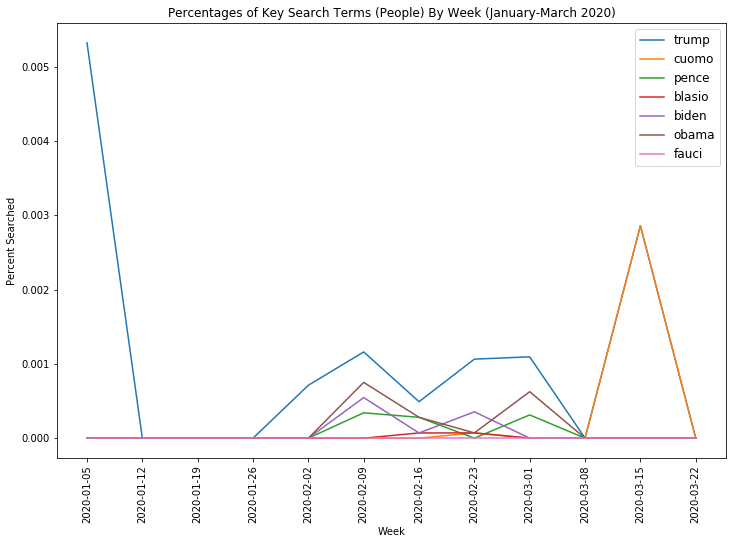

In [8]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d_ppl = {
    'trump': 0,
    'cuomo': 1,
    'pence': 2,
    'blasio': 3,
    'biden': 4,
    'obama': 5,
    'fauci': 6
}

d2_ppl = {
    0: 'trump',
    1: 'cuomo',
    2: 'pence',
    3: 'blasio',
    4: 'biden',
    5: 'obama',
    6: 'fauci'
}

history_ppl = []
weekly_totals_ppl = []
labels_ppl = [] 
for week, wdf_ppl in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf_ppl) >0:
        wdist_ppl = [0 for i in range(7)]
        week_label_ppl = str(week).split(' ')[0]
        labels_ppl.append(week_label_ppl)
        weekly_totals_ppl.append(len(wdf_ppl))
#         print(week_label, len(wdf))
        weekly_queries_ppl = [str(q).lower() for q in wdf_ppl['query'].values.tolist()]
        for q in weekly_queries_ppl:
            if 'trump' in q:
                wdist_ppl[d_ppl['trump']]+=1
            if 'cuomo' in q:
                wdist_ppl[d_ppl['cuomo']]+=1
            if 'pence' in q:
                wdist_ppl[d_ppl['pence']]+=1
            if 'blasio' in q:
                wdist_ppl[d_ppl['blasio']]+=1
            if 'biden' in q:
                wdist_ppl[d_ppl['biden']]+=1
            if 'obama' in q:
                wdist_ppl[d_ppl['obama']]+=1
            if 'fauci' in q:
                wdist_ppl[d_ppl['fauci']]+=1
        history_ppl.append(wdist_ppl)
        
# print(weekly_totals)
history_ppl = np.array(history_ppl)
# print(history)
norm_hist_ppl = np.zeros((len(history_ppl), len(history_ppl[0])))
for i in range(len(history_ppl)):
    factor_ppl = weekly_totals_ppl[i]
    for j in range(len(history_ppl[0])):
        norm_hist_ppl[i][j] = float(history_ppl[i][j])/float(factor_ppl)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history_ppl.shape[1]):
    name_ppl = d2_ppl[col]
    y = norm_hist_ppl[:,col]
    plt.plot(range(len(y)),y,label=name_ppl)

plt.xticks(range(len(labels_ppl)),labels_ppl, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms (People) By Week (January-March 2020)")

Text(0.5, 1.0, 'Popularity of Common Search Terms from Google Trends in March 2020')

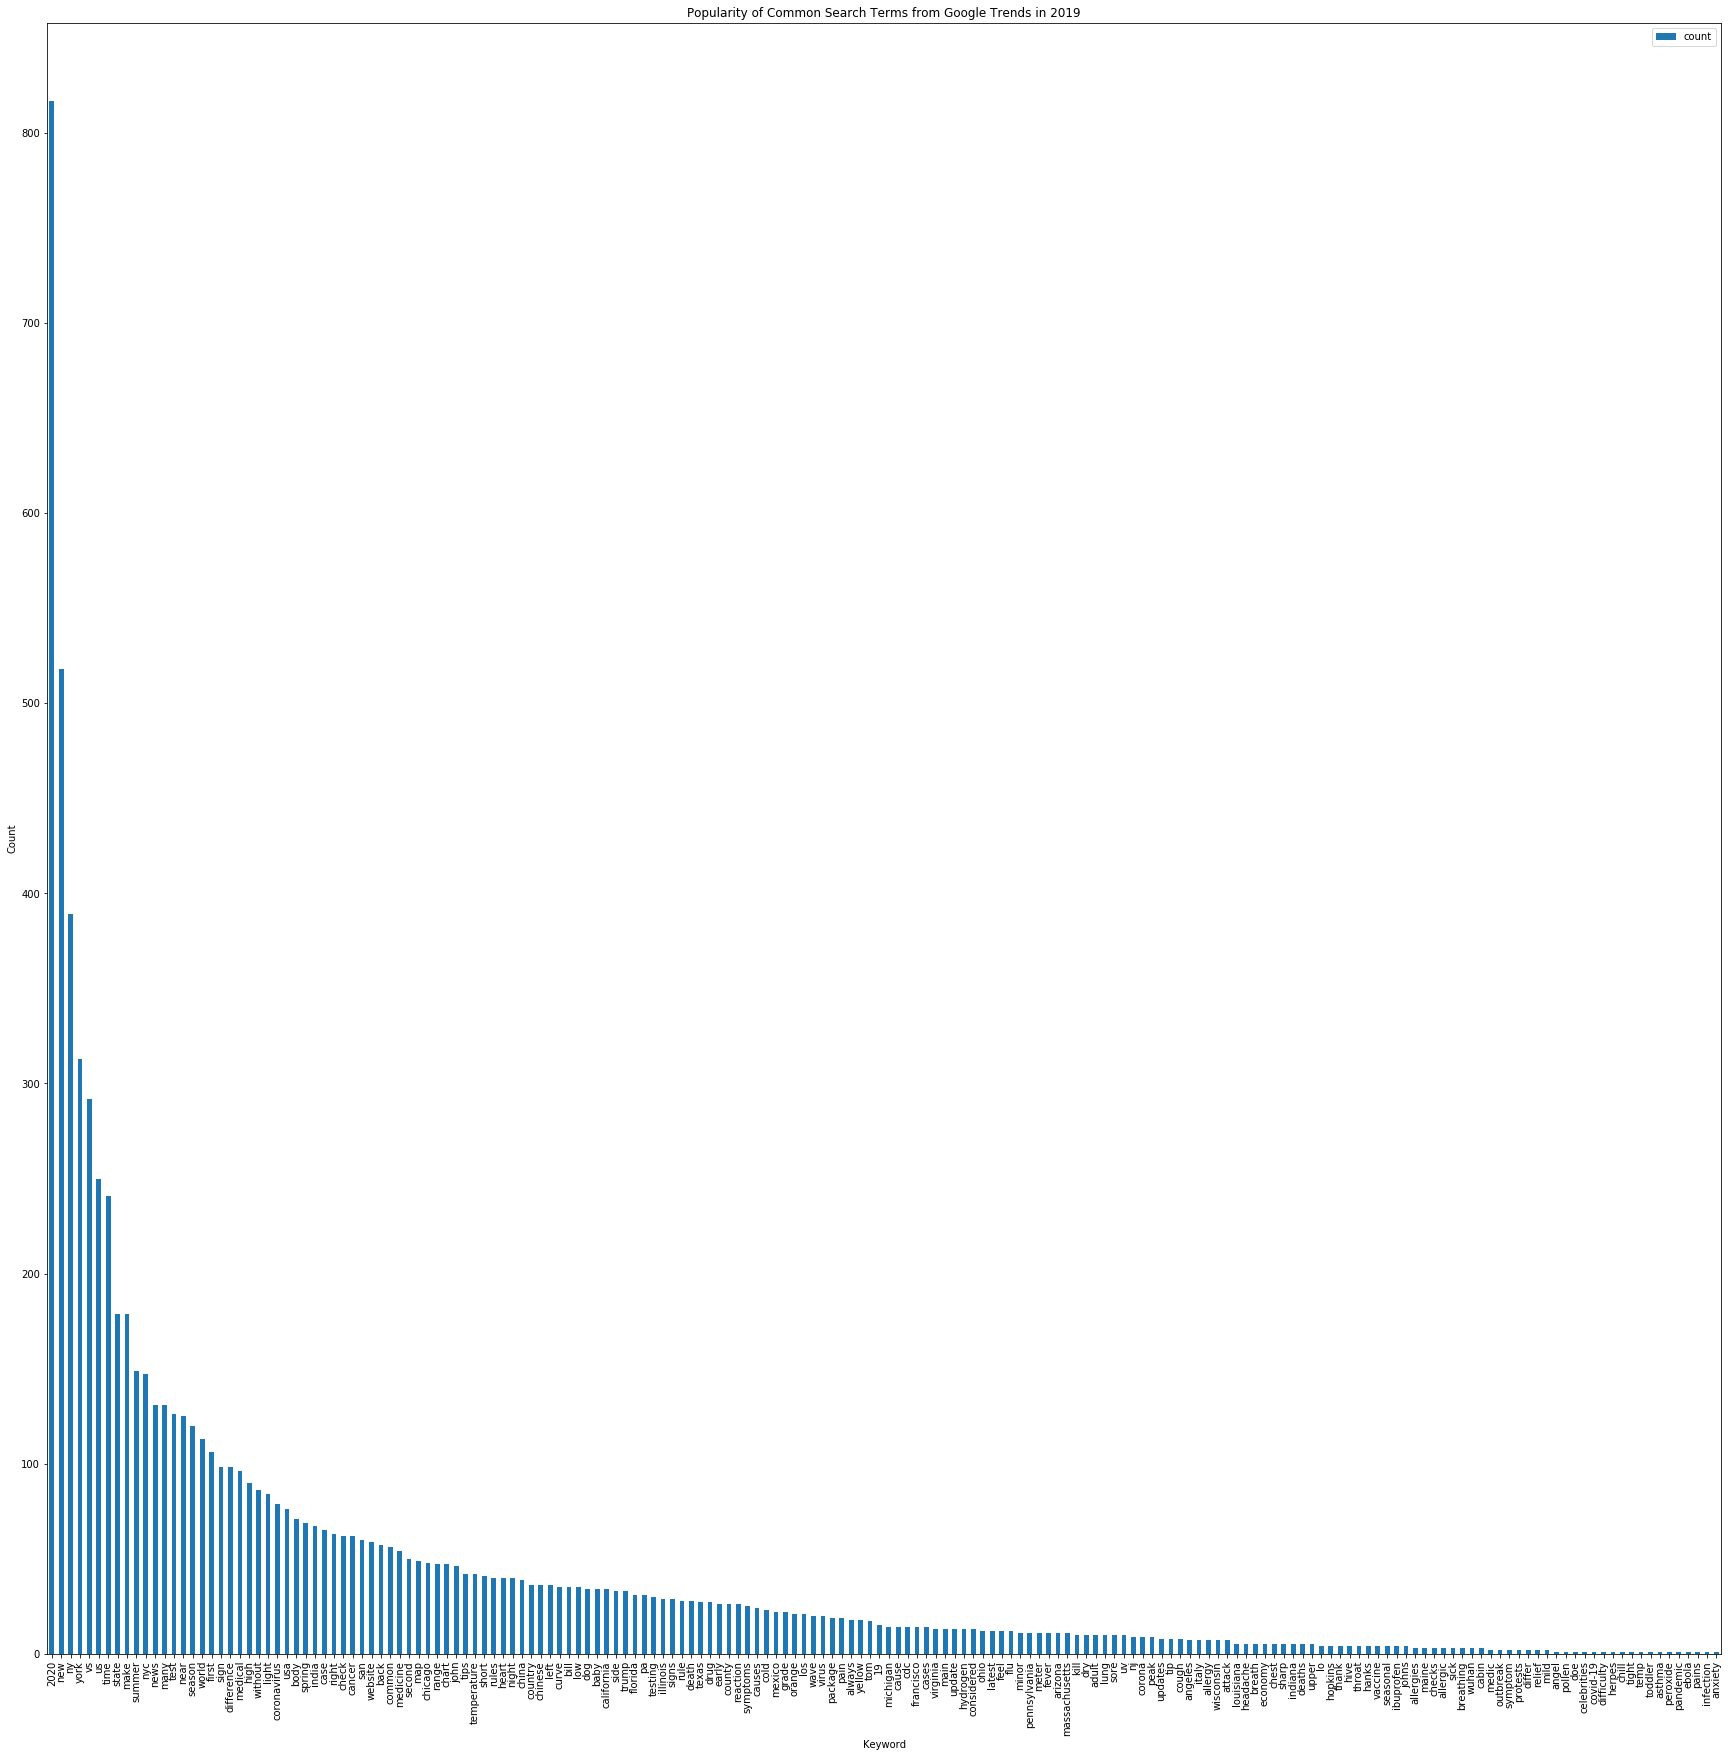

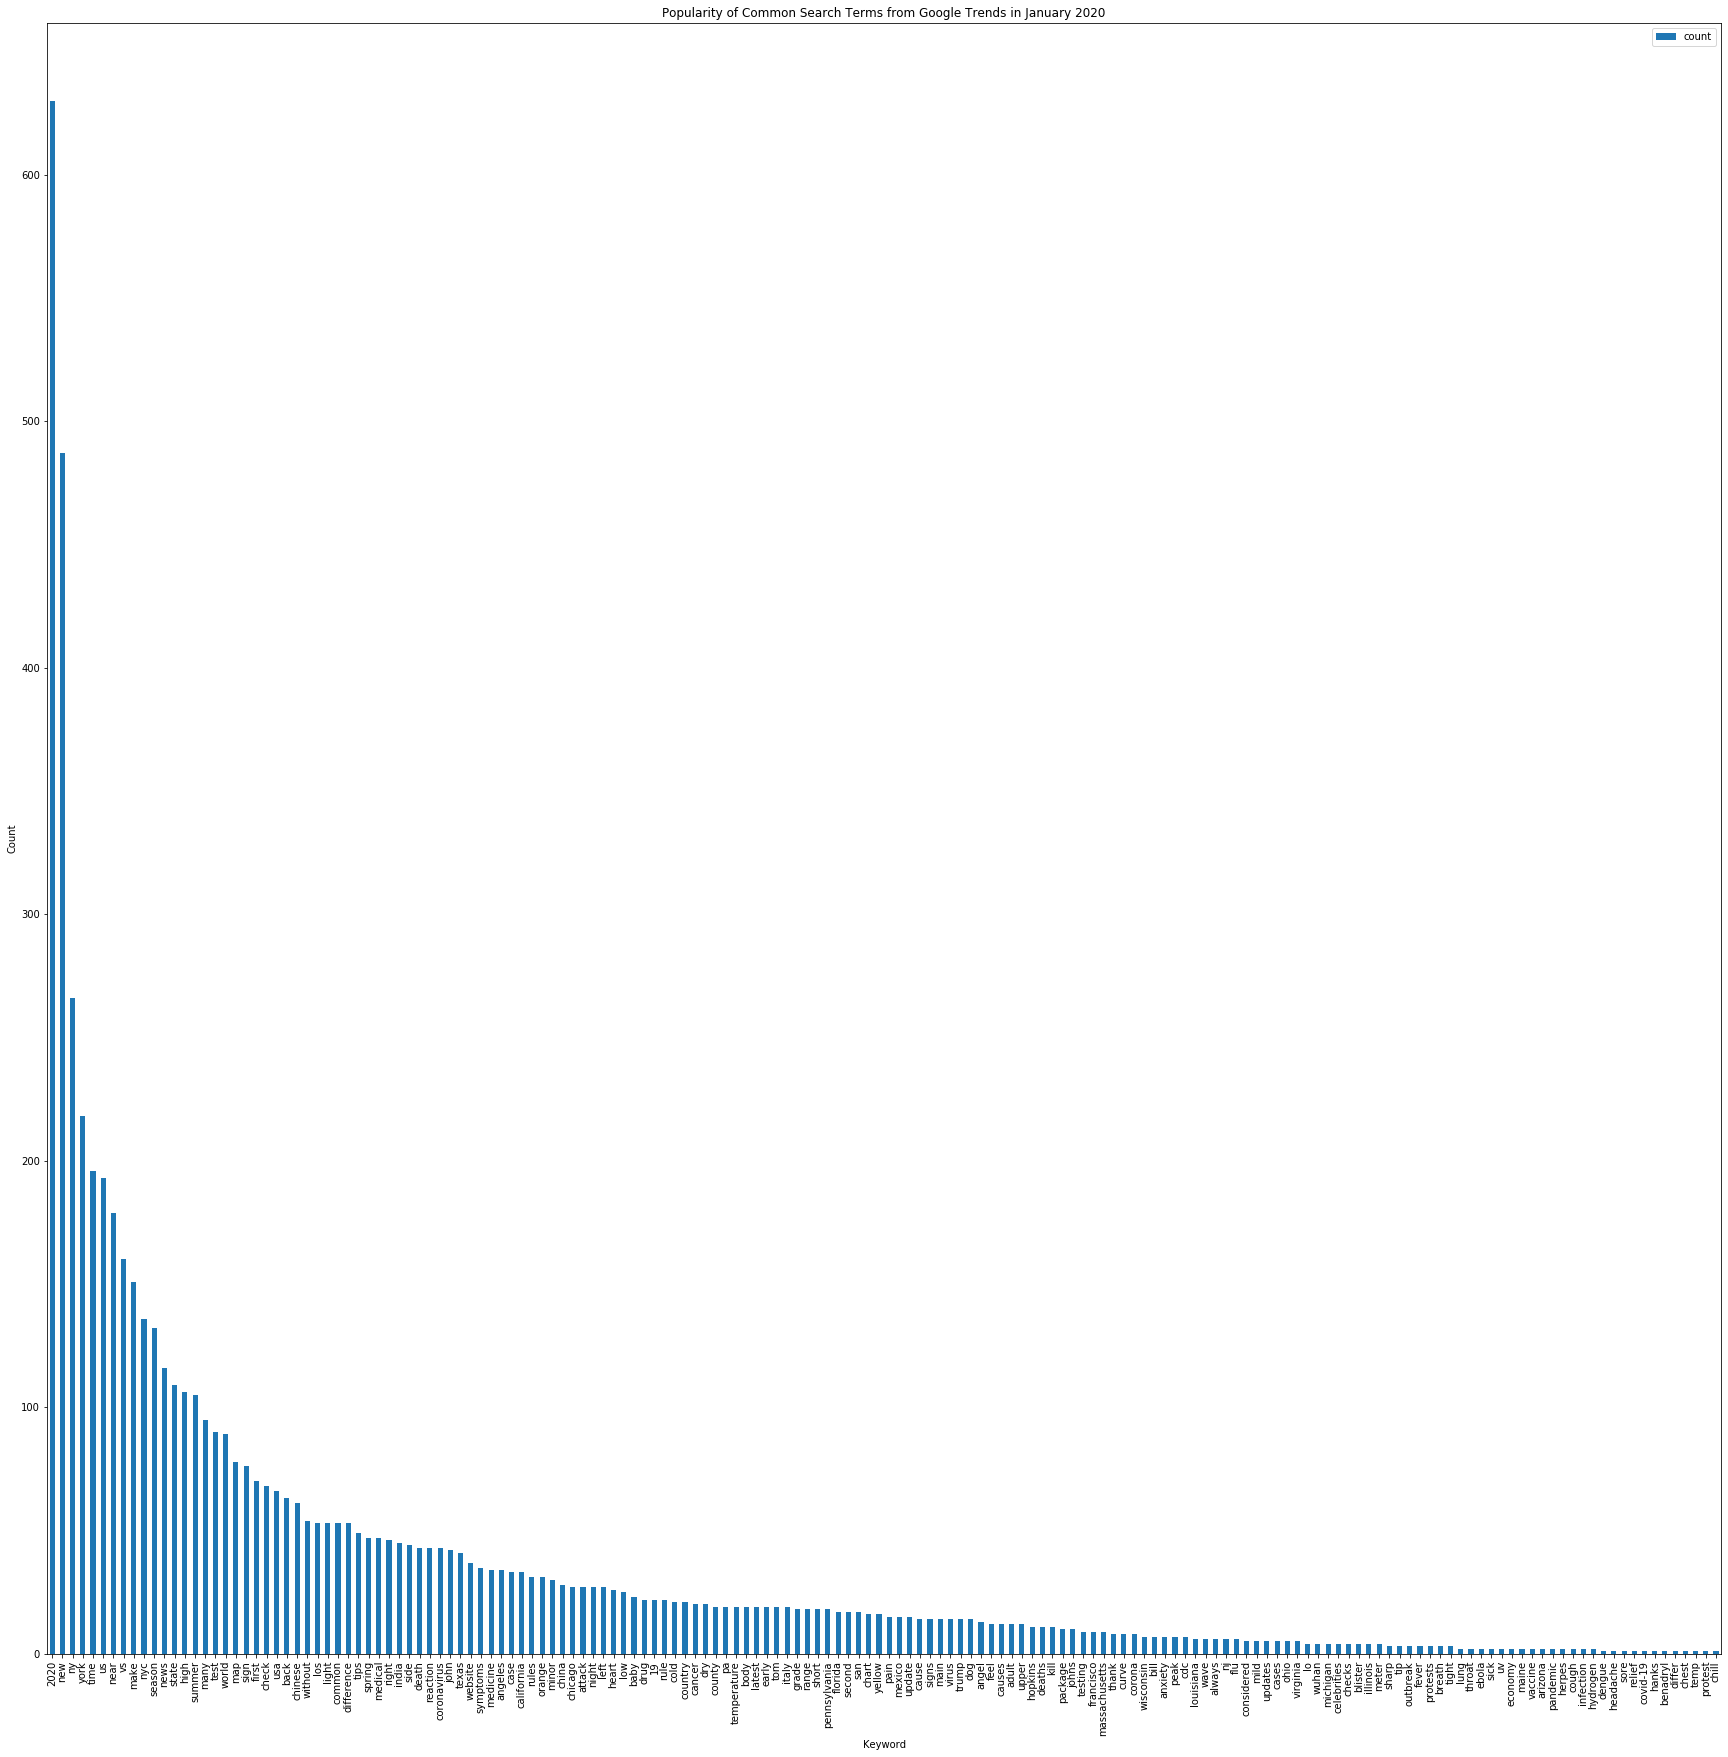

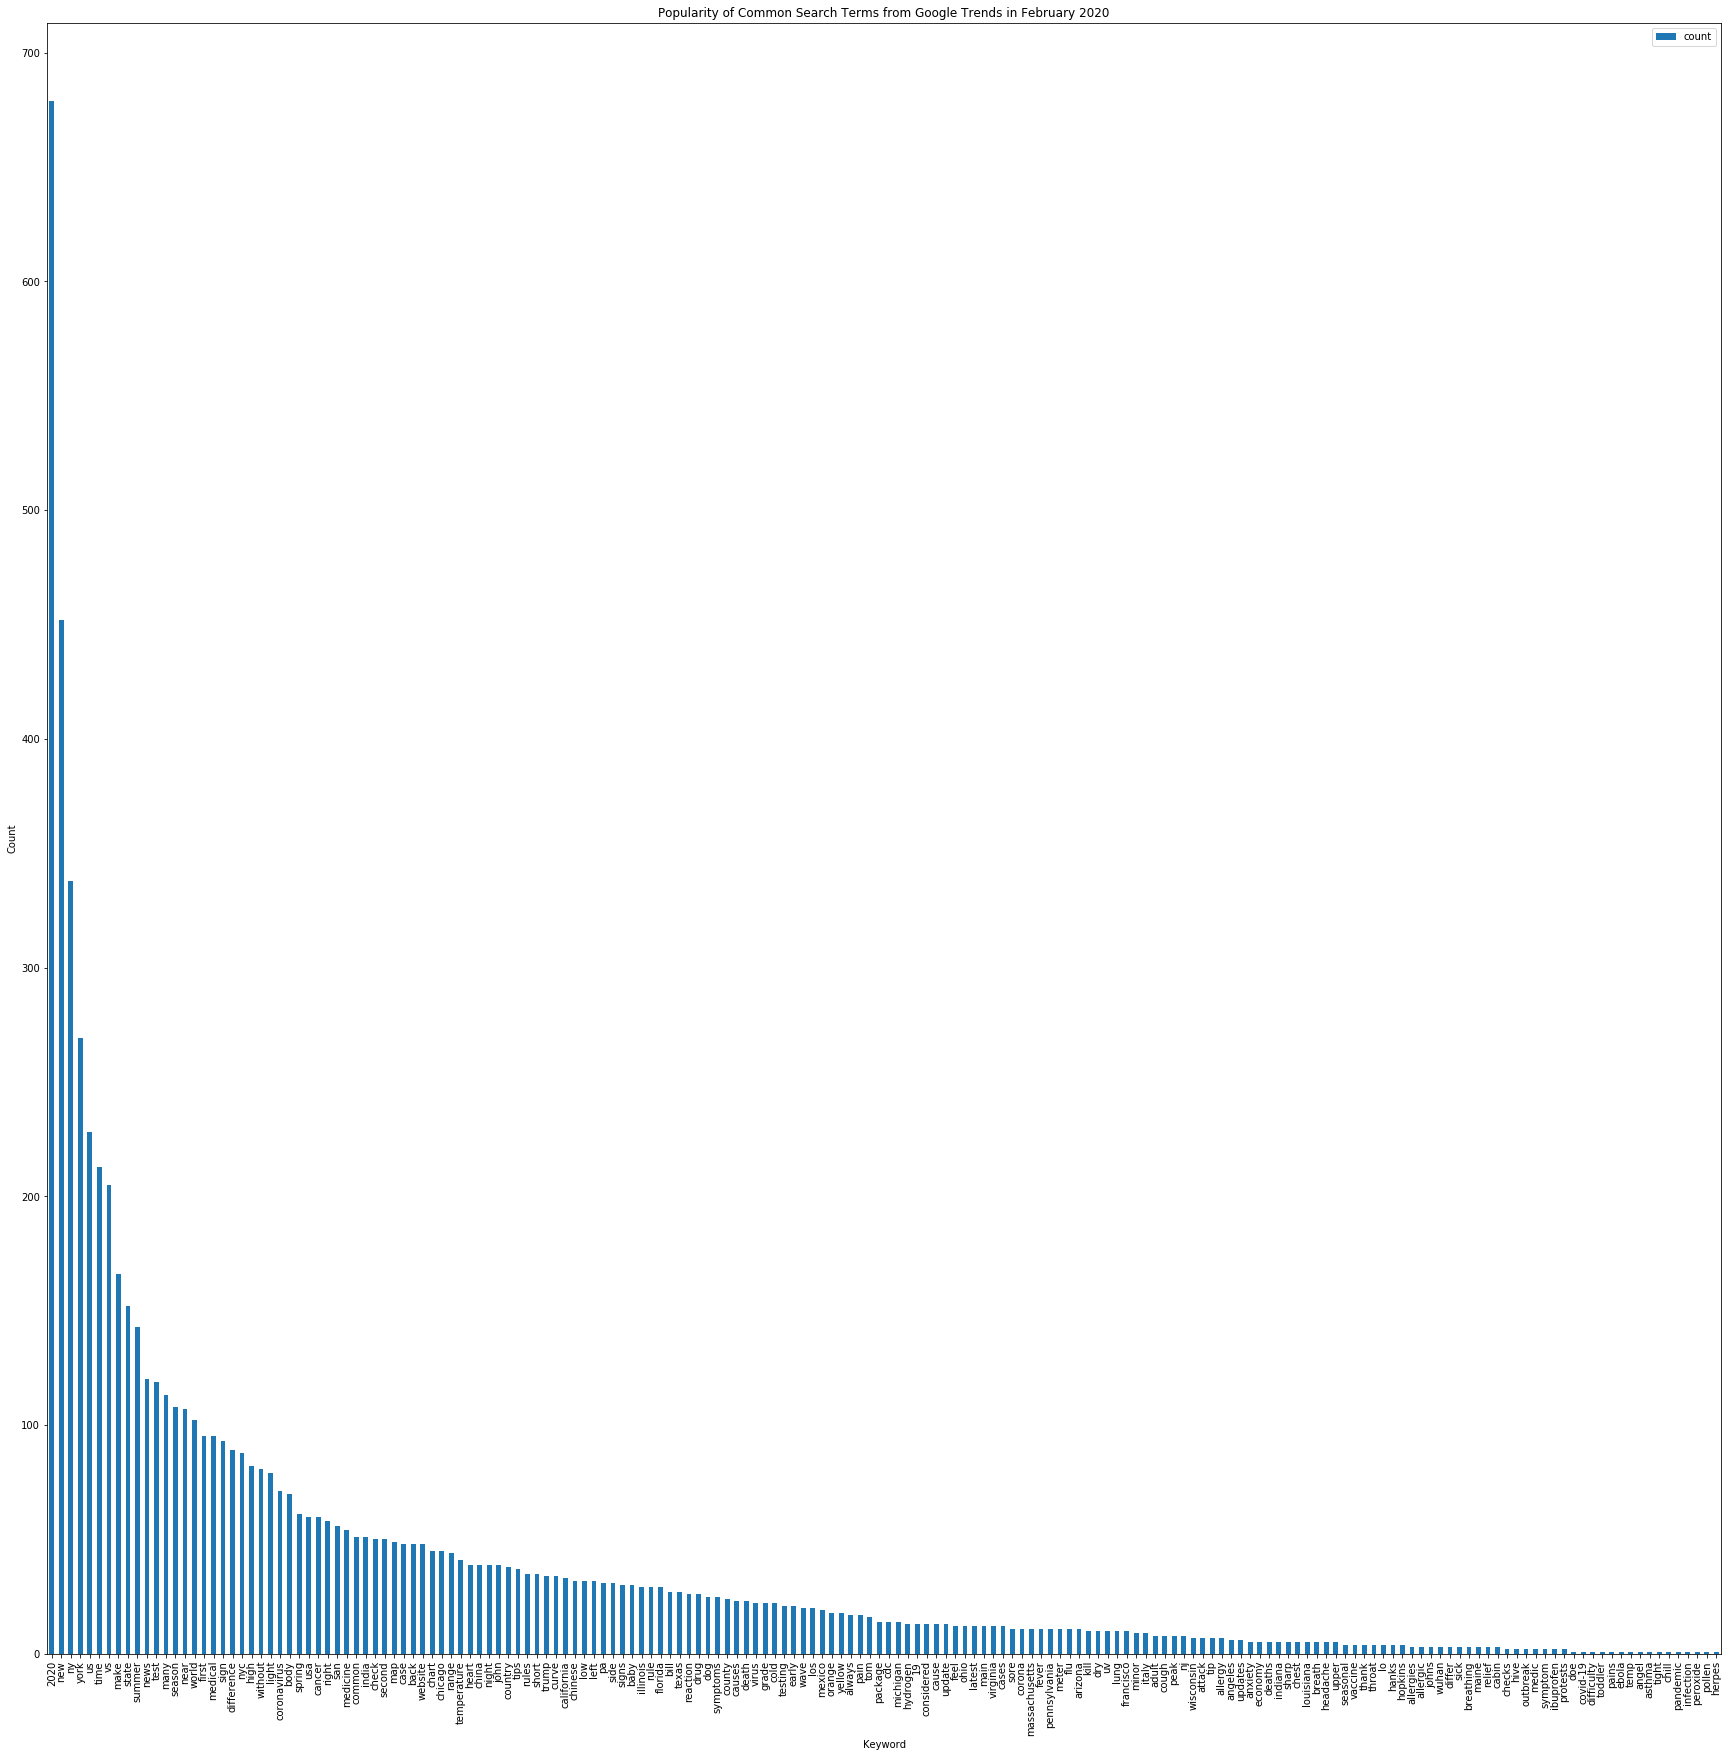

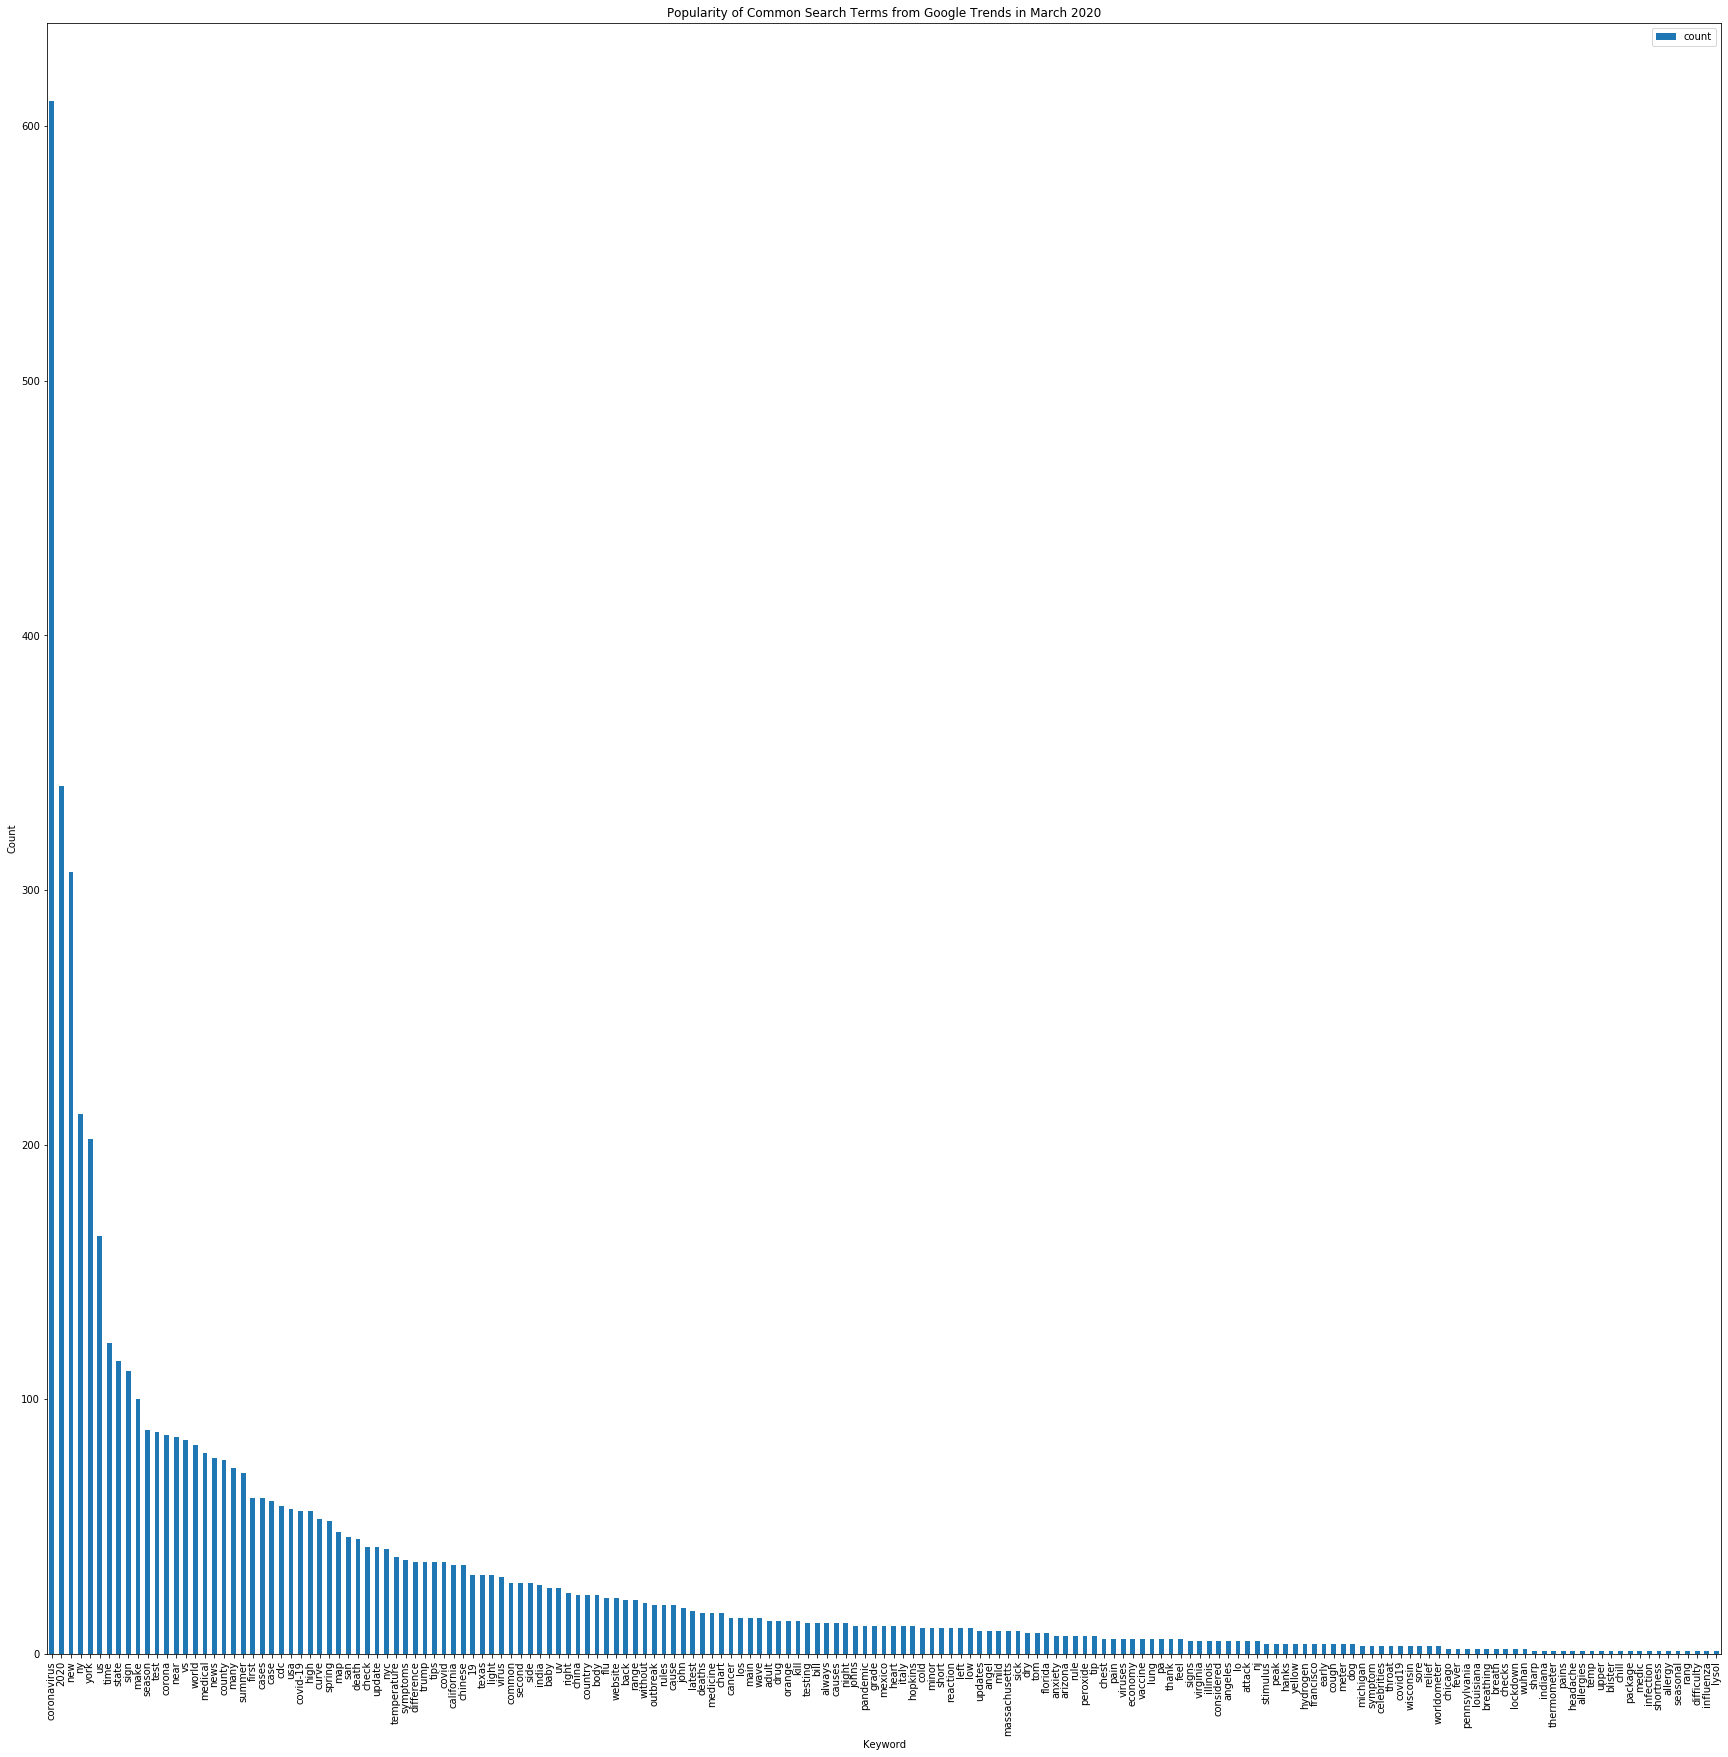

In [13]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

df_2019.dropna(subset=['query'])
df_jan.dropna(subset=['query'])
df_feb.dropna(subset=['query'])
df_march.dropna(subset=['query'])
df_jan_march.dropna(subset=['query'])

file_list = open("words_list.txt", "r")
list_of_phrases = []
for line in file_list:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_phrases.append(line_list)

list_of_phrases = [[x.casefold() for x in sublst] for sublst in list_of_phrases]
        

lowercase_list_of_words = []
for p in list_of_phrases:
    for w in p:
        lowercase_list_of_words.append(w.lower())

lowercase_list_of_words = list(dict.fromkeys(lowercase_list_of_words))


keyword_stemmed_list = []
for p in list_of_phrases:
    for w in p:
        keyword_stemmed_list.append(ps.stem(w.lower()))
        
keyword_stemmed_list = list(dict.fromkeys(keyword_stemmed_list))

full_key_list = lowercase_list_of_words + keyword_stemmed_list 
full_key_list = list(dict.fromkeys(full_key_list))


redundant_words = set(stopwords.words('english'))

filtered_key_list = []
for w in full_key_list:
    if w not in redundant_words:
        filtered_key_list.append(w)

# filtered_key_list = filtered_key_list + list_of_phrases
file_list.close()
# print(filtered_key_list)

search_list_2019 = df_2019['query'].to_list()
search_list_jan = df_jan['query'].to_list()
search_list_feb = df_feb['query'].to_list()
search_list_march = df_march['query'].to_list()
search_list_jan_march = df_jan_march['query'].to_list()

cleaned_search_list_2019=[x.lower() for x in search_list_2019 if str(x) != 'nan']
common = []
for search_term in cleaned_search_list_2019:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common.append(keyword)
            

df_keywords = pd.DataFrame(common, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in 2019")
    

    
cleaned_search_list_jan=[x.lower() for x in search_list_jan if str(x) != 'nan']
common_jan = []
for search_term in cleaned_search_list_jan:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_jan.append(keyword)
            

df_keywords = pd.DataFrame(common_jan, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in January 2020")


cleaned_search_list_feb=[x.lower() for x in search_list_feb if str(x) != 'nan']
common_feb = []
for search_term in cleaned_search_list_feb:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_feb.append(keyword)
            

df_keywords = pd.DataFrame(common_feb, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in February 2020")


cleaned_search_list_march=[x.lower() for x in search_list_march if str(x) != 'nan']
common_march = []
for search_term in cleaned_search_list_march:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_march.append(keyword)
            

df_keywords = pd.DataFrame(common_march, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in March 2020")


    

(0, 6)

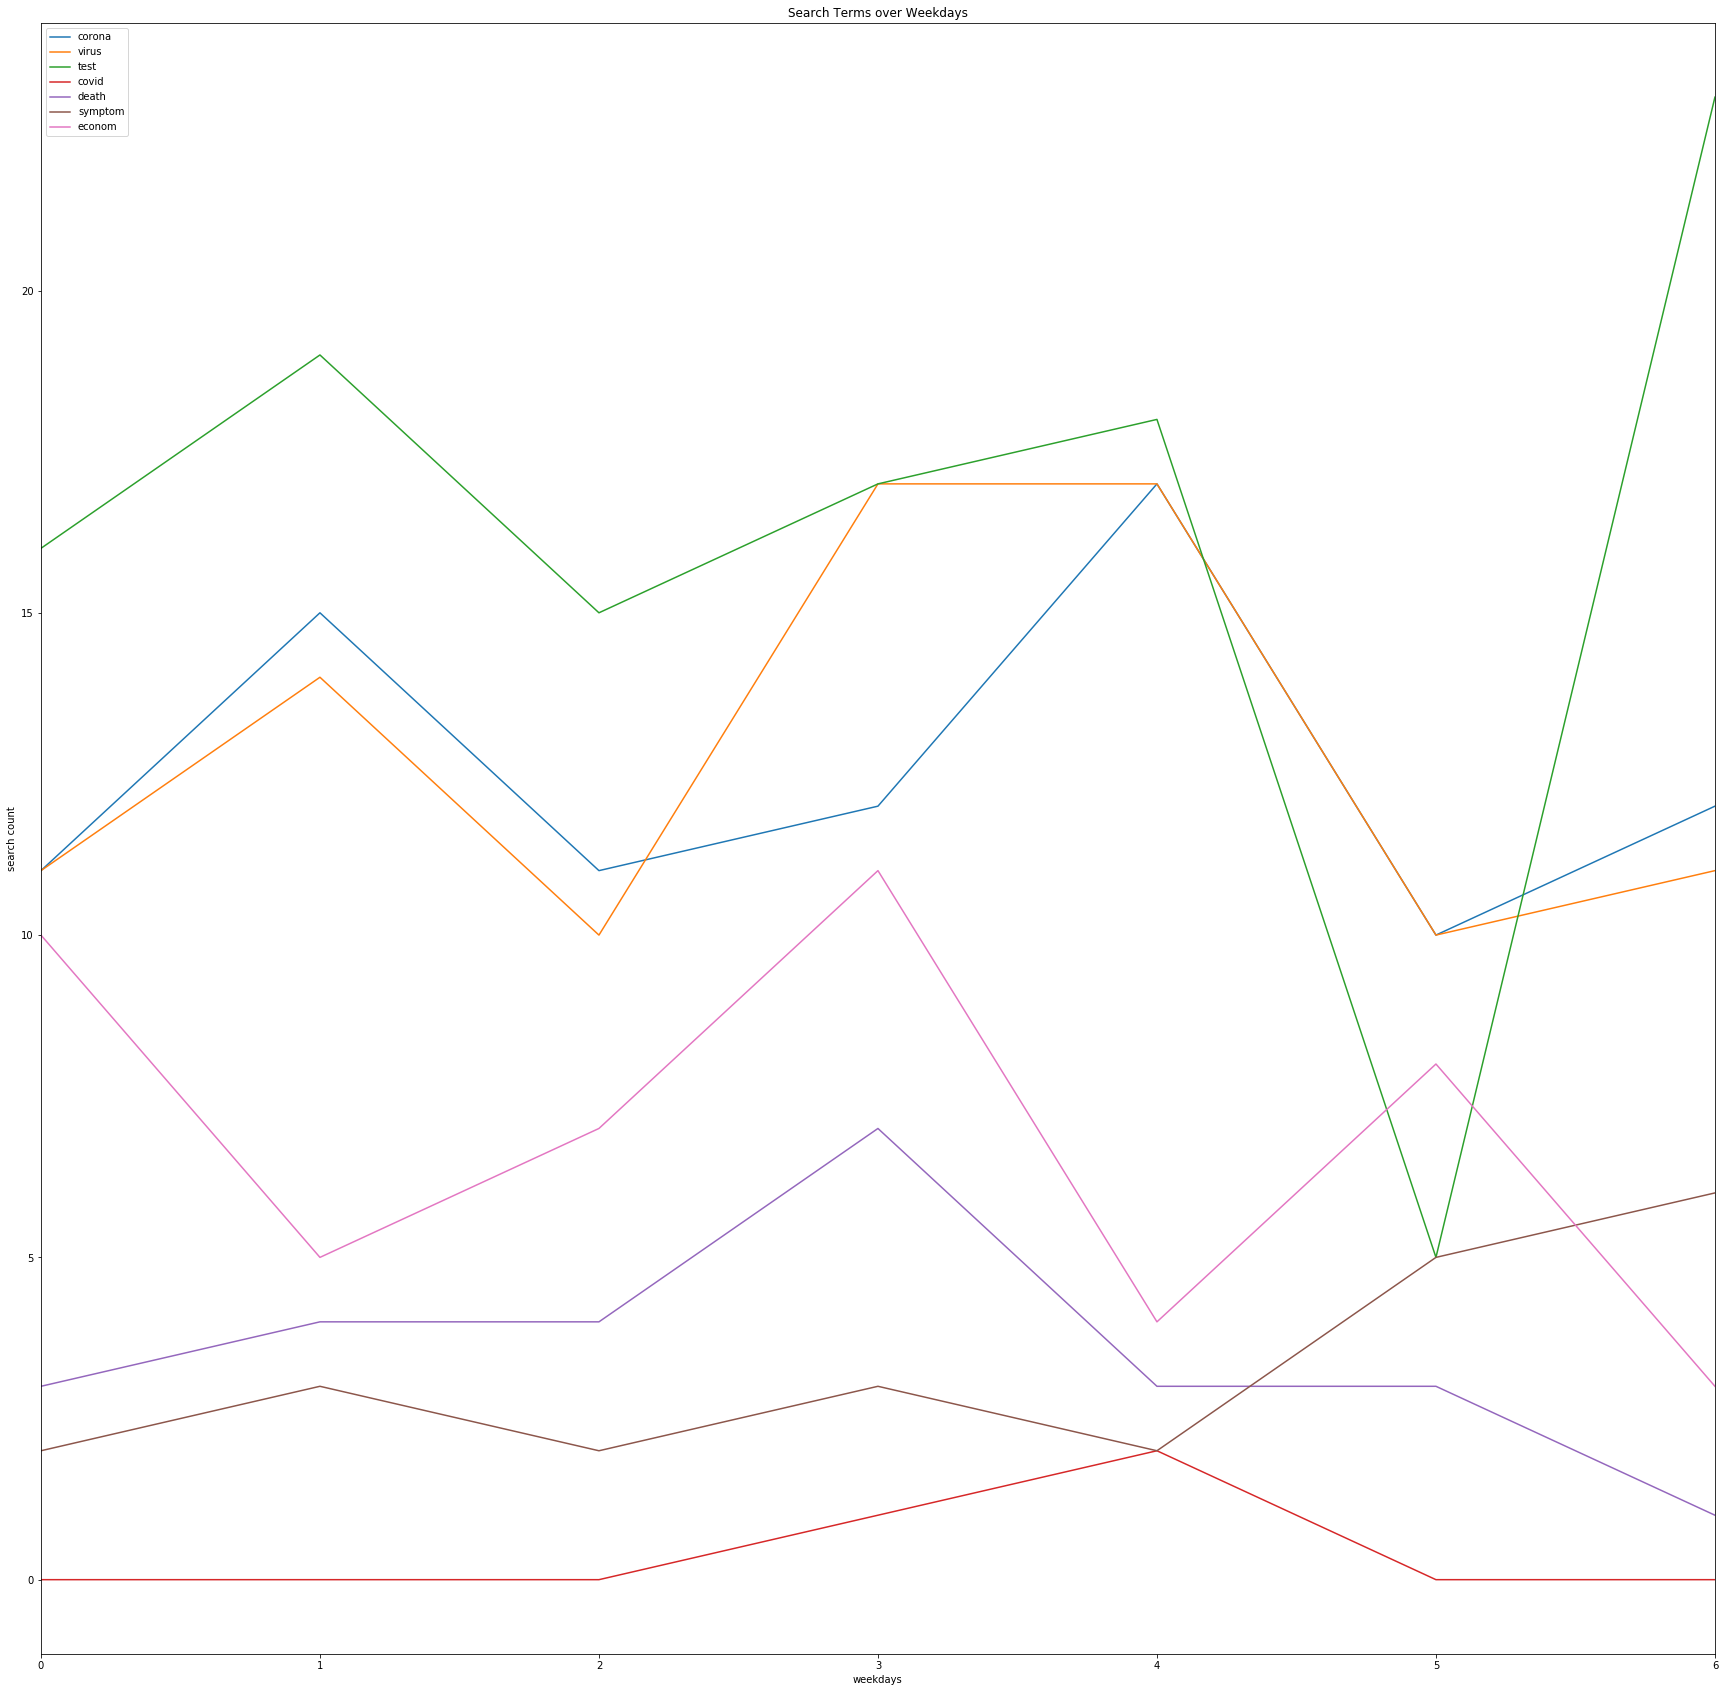

In [15]:
df_grouped_weekday = df_jan_march.groupby(['weekdays', 'query']).count().reset_index()
qlist = df_grouped_weekday['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]
econom_search = [s for s in query_list if 'econom' in s]

key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search + econom_search

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 

corona_plot = df_grouped_weekday['query'].str.contains('corona').groupby(df_grouped_weekday['weekdays']).sum().plot(label='corona')
virus_plot = df_grouped_weekday['query'].str.contains('virus').groupby(df_grouped_weekday['weekdays']).sum().plot(label='virus')
test_plot = df_grouped_weekday['query'].str.contains('test').groupby(df_grouped_weekday['weekdays']).sum().plot(label='test')
covid_plot = df_grouped_weekday['query'].str.contains('covid').groupby(df_grouped_weekday['weekdays']).sum().plot(label='covid')
death_plot = df_grouped_weekday['query'].str.contains('death').groupby(df_grouped_weekday['weekdays']).sum().plot(label='death')
symptom_plot = df_grouped_weekday['query'].str.contains('symptom').groupby(df_grouped_weekday['weekdays']).sum().plot(label='symptom')
econom_plot = df_grouped_weekday['query'].str.contains('econom').groupby(df_grouped_weekday['weekdays']).sum().plot(label='econom')
plt.xlabel('weekdays')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms over Weekdays")
plt.xlim(0,6)

(0, 23)

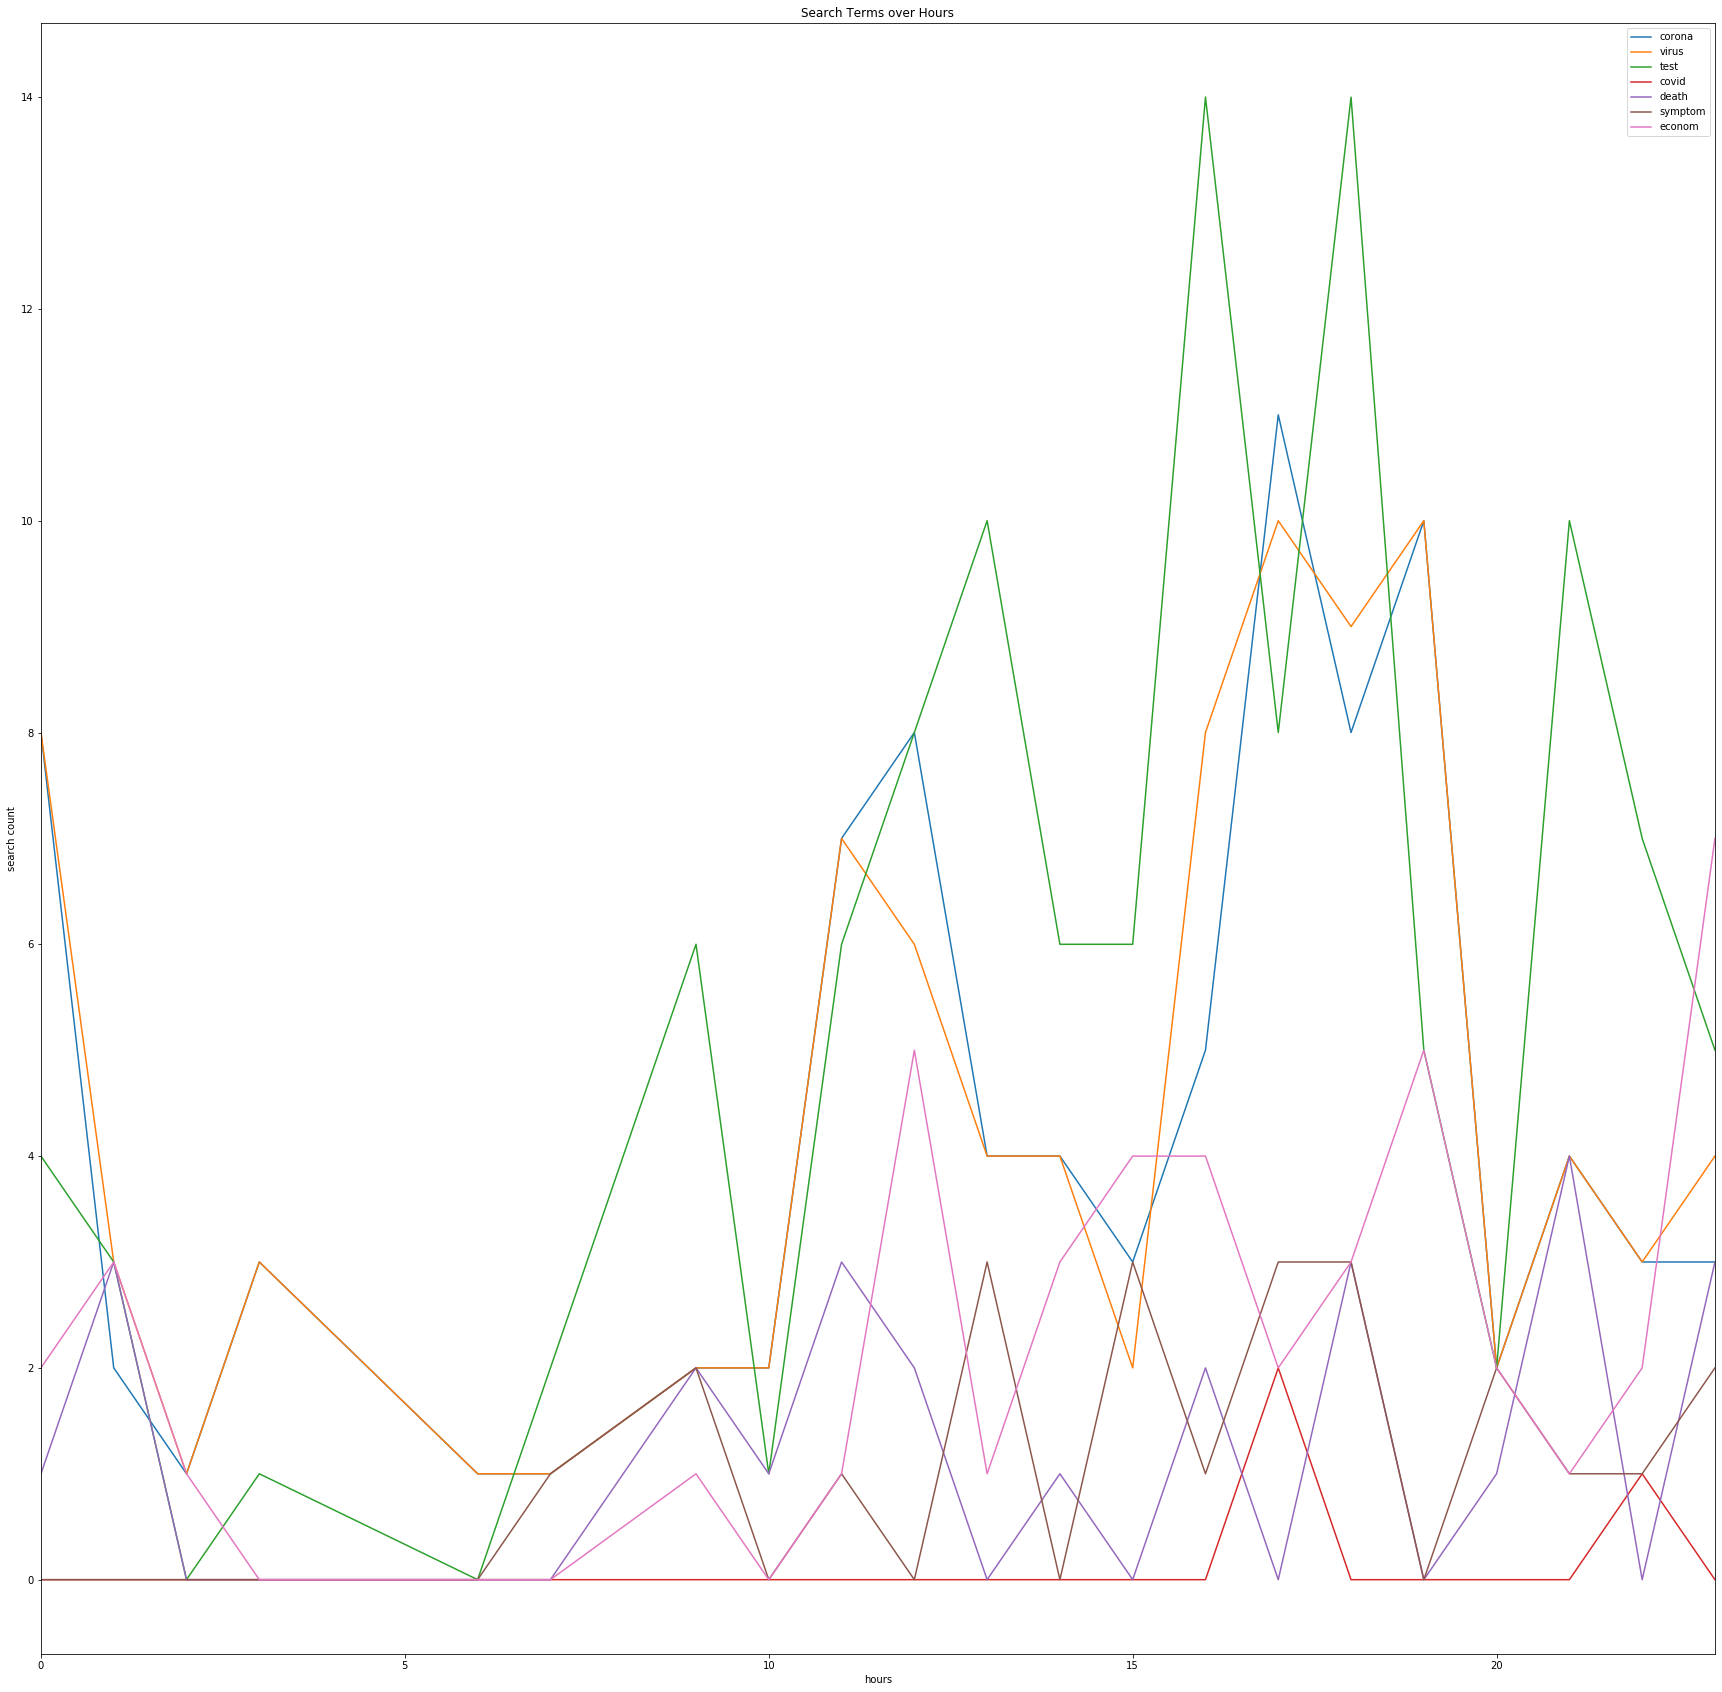

In [12]:
df_grouped_hour = df_jan_march.groupby(['hours', 'query']).count().reset_index()
qlist = df_grouped_hour['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
econom_search = [s for s in query_list if 'econom' in s]

key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + econom_search

df_grouped_hour = df_grouped_hour[df_grouped_hour['query'].isin(key_search)] 

corona_plot = df_grouped_hour['query'].str.contains('corona').groupby(df_grouped_hour['hours']).sum().plot(label='corona')
virus_plot = df_grouped_hour['query'].str.contains('virus').groupby(df_grouped_hour['hours']).sum().plot(label='virus')
test_plot = df_grouped_hour['query'].str.contains('test').groupby(df_grouped_hour['hours']).sum().plot(label='test')
covid_plot = df_grouped_hour['query'].str.contains('covid').groupby(df_grouped_hour['hours']).sum().plot(label='covid')
death_plot = df_grouped_hour['query'].str.contains('death').groupby(df_grouped_hour['hours']).sum().plot(label='death')
symptom_plot = df_grouped_hour['query'].str.contains('symptom').groupby(df_grouped_hour['hours']).sum().plot(label='symptom')
econom_plot = df_grouped_hour['query'].str.contains('econom').groupby(df_grouped_hour['hours']).sum().plot(label='econom')
plt.xlabel('hours')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms over Hours")
plt.xlim(0,23)